In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='CreditScore', ylabel='Count'>

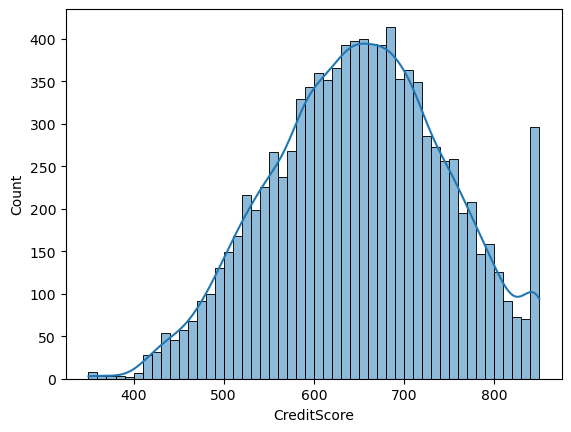

In [6]:
sns.histplot(df['CreditScore'],bins=50,kde=True)

<Axes: xlabel='Exited', ylabel='count'>

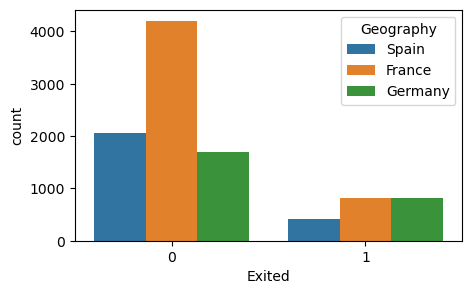

In [7]:
plt.figure(figsize=(5,3))
sns.countplot(x='Exited',data=df,hue='Geography')

In [8]:
#Encoding the labels
from sklearn.preprocessing import LabelEncoder

In [9]:
le_gender=LabelEncoder()
df['Gender']=le_gender.fit_transform(df['Gender'])

In [10]:
rank=df.groupby('Geography').mean()['Exited'].sort_values()

In [11]:
ranking={geography:rank for rank,geography in enumerate(rank.index,1)}

In [12]:
df['Geography_Rank']=df['Geography'].map(ranking)
df.drop('Geography',axis=1,inplace=True)

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Rank
0,619,0,42,2,0.00,1,1,1,101348.88,1,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,2
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,1
4,850,0,43,2,125510.82,1,1,1,79084.10,0,2


In [14]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [15]:
#Splitting the data|
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [16]:
#Model Creation

In [17]:
from xgboost import XGBClassifier

# Initializing the model
xgb = XGBClassifier(
    n_estimators=200,         
    learning_rate=0.1,        
    max_depth=5,              
    subsample=0.8,            
    colsample_bytree=0.8,     
    random_state=42,
    eval_metric="logloss"
)

# Fit the model
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

Axes(0.125,0.11;0.62x0.77)


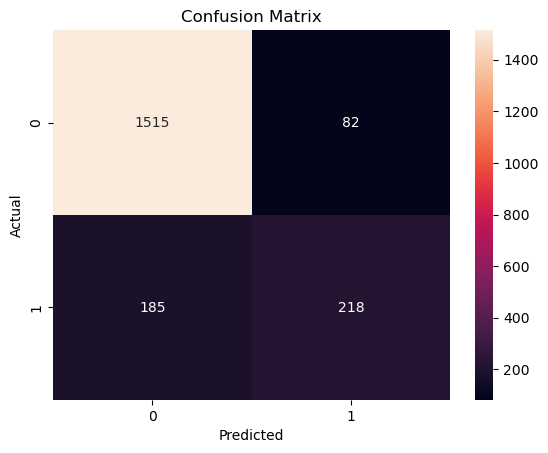

In [18]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
plt.title('Confusion Matrix')
print(sns.heatmap(confusion_matrix(y_test, y_pred),fmt='d',annot=True))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1597
           1       0.73      0.54      0.62       403

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8665
